## - 불러올 패키지 목록

In [1]:
# 파이썬 기본 패키지
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.formula.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.multivariate.pca import PCA as pca  # 대문자로 사용할 경우 sklearn 의 PCA와 겹침

# 시계열 관련 statsmodels 패키지
from statsmodels.tsa.api import *
from statsmodels.tsa.ar_model import *
from statsmodels.tsa.arima.model import *
from statsmodels.tsa.arima_process import *
from statsmodels.tsa.statespace import *
from statsmodels.graphics.api import *
from statsmodels.graphics.tsaplots import *

# SciPy 패키지
import scipy as sp
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# pingouin 패키지
import pingouin as pg

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공
from sklearn.multiclass import OneVsRestClassifier  # multiclass 분류기 알고리즘 제공

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  # 변수선택 알고리즘 포함
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False
#
#

# Dataset 불러오기 및 data 정보 확인

## Dataset 불러오기

In [2]:
# 데이터 로드 및 데이터프레임 생성
df_credit = pd.read_csv( r'C:\Users\Boanerges\GitHub\TIL\rawdata\credit_final.csv')

df_credit

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


## Dataset에 대한 정보 및 대략적인 분포 확인

In [3]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   credit.rating                   1000 non-null   int64
 1   account.balance                 1000 non-null   int64
 2   credit.duration.months          1000 non-null   int64
 3   previous.credit.payment.status  1000 non-null   int64
 4   credit.purpose                  1000 non-null   int64
 5   credit.amount                   1000 non-null   int64
 6   savings                         1000 non-null   int64
 7   employment.duration             1000 non-null   int64
 8   installment.rate                1000 non-null   int64
 9   marital.status                  1000 non-null   int64
 10  guarantor                       1000 non-null   int64
 11  residence.duration              1000 non-null   int64
 12  current.assets                  1000 non-null   int64
 13  age 

In [4]:
df_credit.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.rating,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0
account.balance,1000.0,2.183,0.835589,1.0,1.0,2.0,3.00,3.0
credit.duration.months,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
previous.credit.payment.status,1000.0,2.292,0.620581,1.0,2.0,2.0,3.00,3.0
credit.purpose,1000.0,2.965,0.971967,1.0,2.0,3.0,4.00,4.0
credit.amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
savings,1000.0,1.874,1.196476,1.0,1.0,1.0,3.00,4.0
employment.duration,1000.0,2.446,1.105580,1.0,2.0,2.0,4.00,4.0
installment.rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
marital.status,1000.0,2.372,1.067125,1.0,1.0,3.0,3.00,4.0


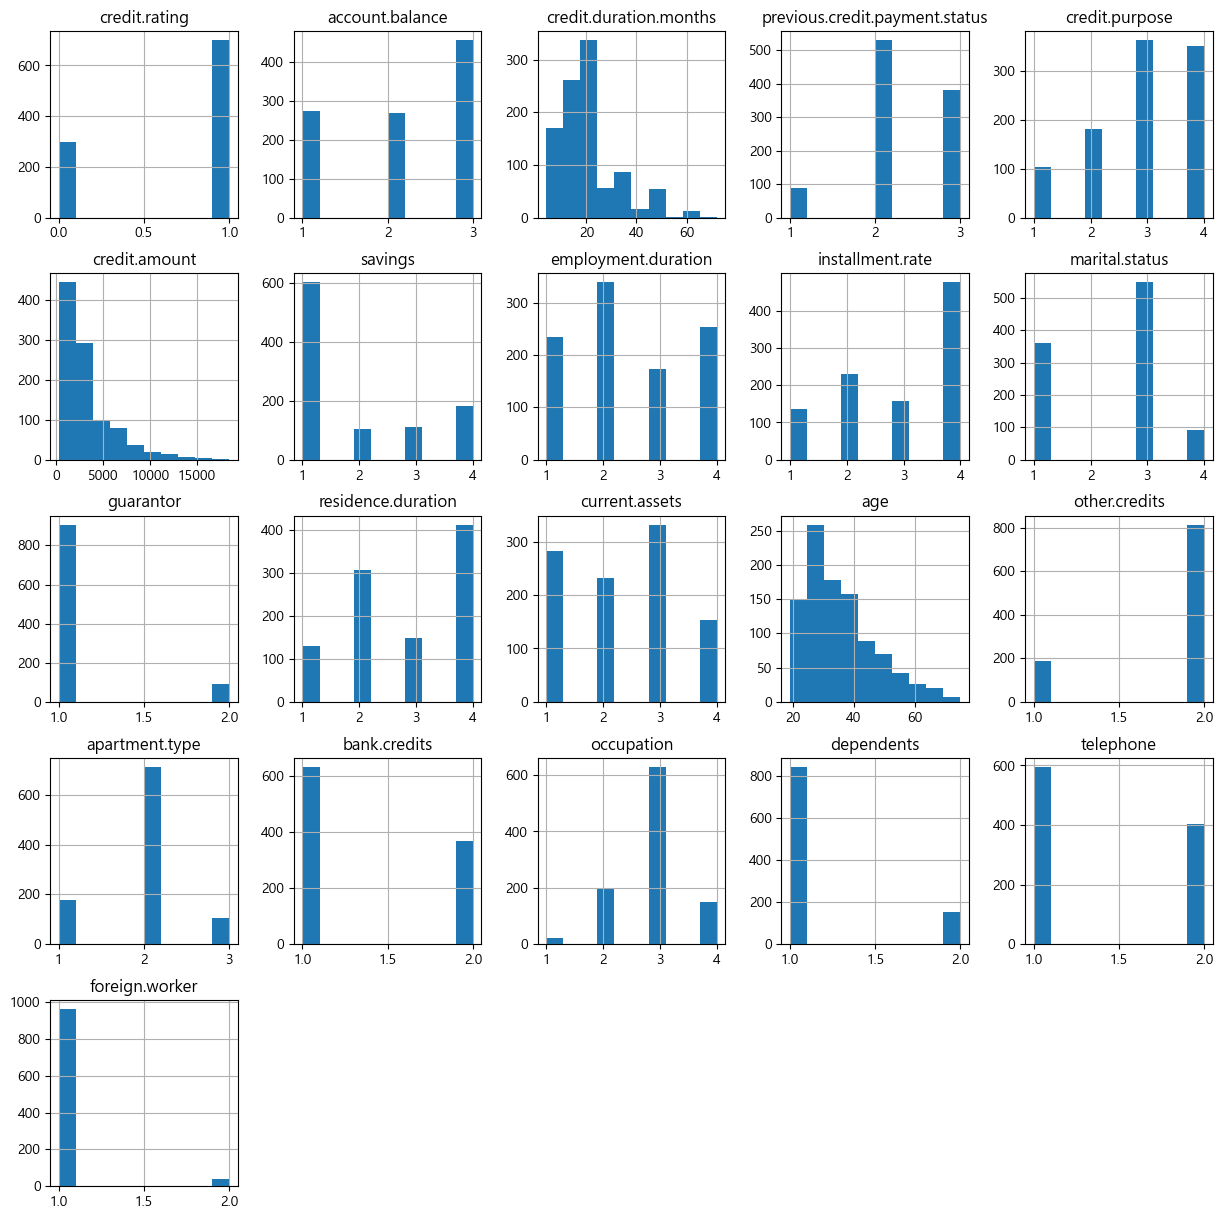

In [5]:
df_credit.hist(figsize=(15,15))
plt.show()

In [6]:
df_credit2 = df_credit.copy()

df_credit2.iloc[:,2] = np.log1p(df_credit2.iloc[:,2])
df_credit2.iloc[:,5] = np.log1p(df_credit2.iloc[:,5])
df_credit2.iloc[:,13] = np.log1p(df_credit2.iloc[:,13])

df_credit2

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,2.944439,3,2,6.956545,1,1,4,1,...,4,2,3.091042,2,1,1,3,1,1,1
1,1,1,2.302585,3,4,7.937375,1,2,2,3,...,2,1,3.610918,2,1,2,3,2,1,1
2,1,2,2.564949,2,4,6.735780,2,3,2,1,...,4,1,3.178054,2,1,1,2,1,1,1
3,1,1,2.564949,3,4,7.660585,1,2,3,3,...,2,1,3.688879,2,1,2,2,2,1,2
4,1,1,2.564949,3,4,7.683404,1,2,4,3,...,4,2,3.663562,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,3.218876,2,3,7.594884,1,2,2,3,...,4,1,3.091042,2,1,1,2,2,1,1
996,0,1,3.218876,2,4,7.742402,1,4,4,3,...,1,1,3.828641,2,2,1,3,1,1,1
997,0,3,3.091042,3,4,9.447860,4,4,4,3,...,4,4,3.433987,2,3,1,4,1,2,1
998,0,2,2.564949,2,3,8.774777,4,1,2,3,...,1,4,3.970292,2,2,1,4,1,2,1


In [7]:
df_scaled = StandardScaler().fit_transform(df_credit2)

for i in list(range(1,21,1)):
    df_credit2.iloc[:,i] = df_scaled[:,i]
    
df_credit2

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,-1.416476,0.006404,1.141437,-0.993329,-1.073423,-0.730844,-1.308566,0.918477,-1.286341,...,1.046987,-0.341055,-1.594638,0.478018,-1.751205,-0.761432,0.146949,-0.428290,-0.823318,-0.196014
1,1,-1.416476,-1.168929,1.141437,1.065384,0.190985,-0.730844,-0.403610,-0.870183,0.588792,...,-0.765977,-1.293723,0.193611,0.478018,-1.751205,1.313315,0.146949,2.334869,-0.823318,-0.196014
2,1,-0.219117,-0.688500,-0.470762,1.065384,-1.358017,0.105362,0.501345,-0.870183,-1.286341,...,1.046987,-1.293723,-1.295339,0.478018,-1.751205,-0.761432,-1.383771,-0.428290,-0.823318,-0.196014
3,1,-1.416476,-0.688500,1.141437,1.065384,-0.165830,-0.730844,-0.403610,0.024147,0.588792,...,-0.765977,-1.293723,0.461780,0.478018,-1.751205,1.313315,-1.383771,2.334869,-0.823318,5.101669
4,1,-1.416476,-0.688500,1.141437,1.065384,-0.136414,-0.730844,-0.403610,0.918477,0.588792,...,1.046987,-0.341055,0.374693,-2.091971,0.135869,1.313315,-1.383771,-0.428290,-0.823318,5.101669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,-1.416476,0.508940,-0.470762,0.036027,-0.250527,-0.730844,-0.403610,-0.870183,0.588792,...,1.046987,-1.293723,-1.594638,0.478018,-1.751205,-0.761432,-1.383771,2.334869,-0.823318,-0.196014
996,0,-1.416476,0.508940,-0.470762,1.065384,-0.060358,-0.730844,1.406301,0.918477,0.588792,...,-1.672459,-1.293723,0.942528,0.478018,0.135869,-0.761432,0.146949,-0.428290,-0.823318,-0.196014
997,0,0.978242,0.274858,1.141437,1.065384,2.138185,1.777773,1.406301,0.918477,0.588792,...,1.046987,1.564281,-0.414989,0.478018,2.022944,-0.761432,1.677670,-0.428290,1.214598,-0.196014
998,0,-0.219117,-0.688500,-0.470762,0.036027,1.270499,1.777773,-1.308566,-0.870183,0.588792,...,-1.672459,1.564281,1.429773,0.478018,0.135869,-0.761432,1.677670,-0.428290,1.214598,-0.196014


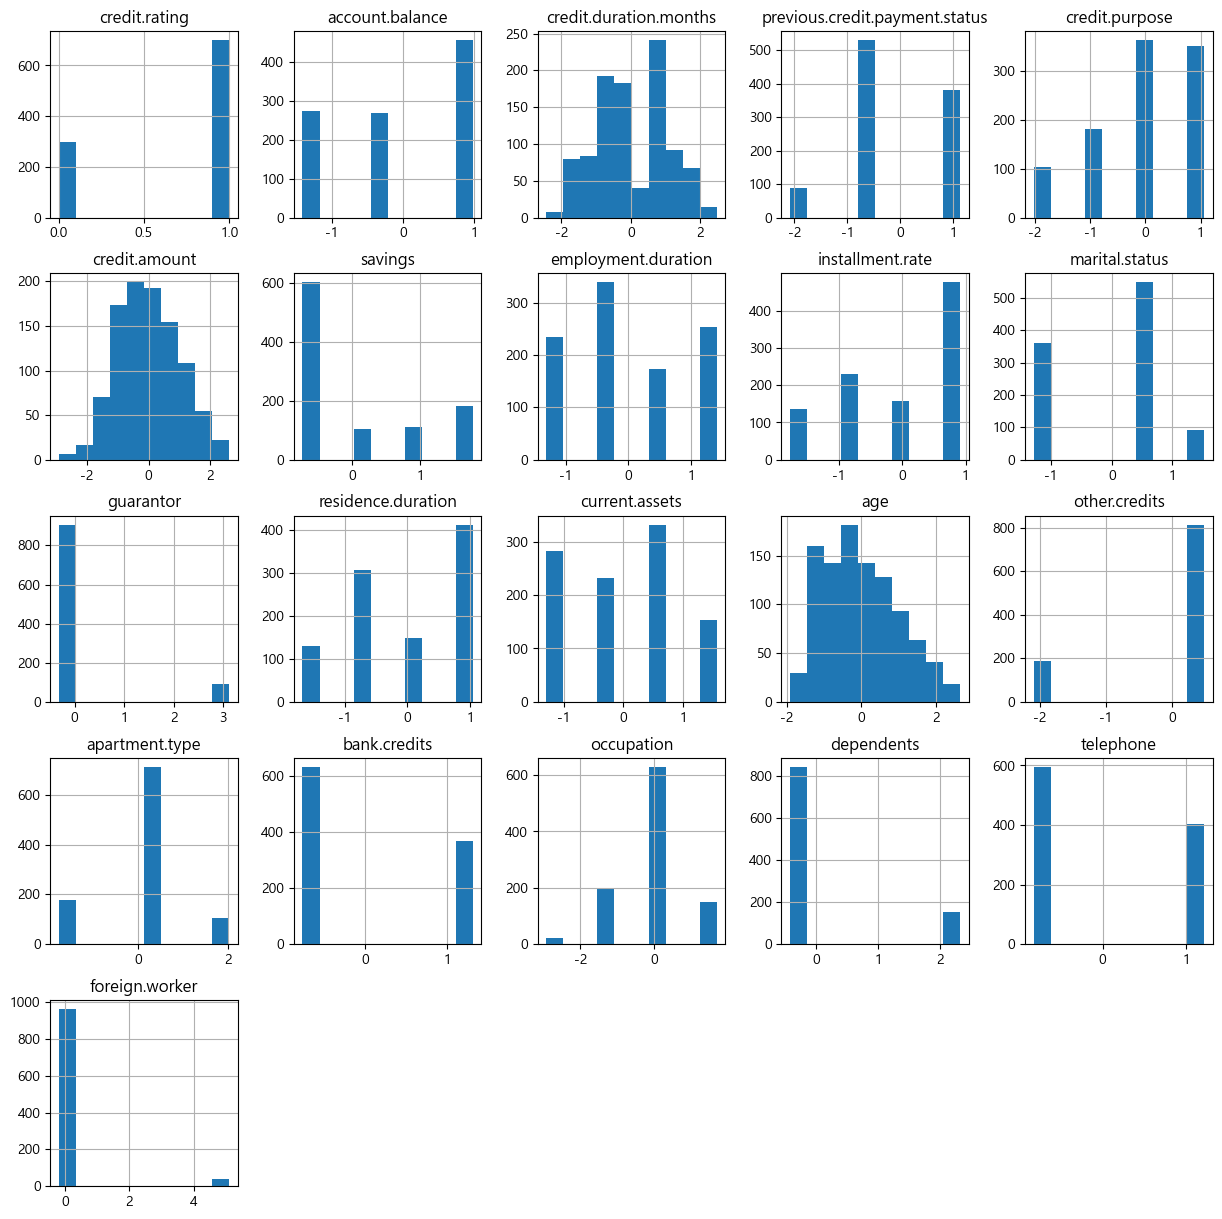

In [8]:
df_credit2.hist(figsize=(15,15))
plt.show()

# 로지스틱 회귀분석 - statsmodels

- `statsmodels.discrete.discrete_model.Logit( endog, exog, check_rank=True, **kwargs )`  
https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.html

- `statsmodels.formula.api.logit( formula, data, subset=None, drop_cols=None, *args, **kwargs )`  
https://www.statsmodels.org/stable/generated/statsmodels.formula.api.logit.html

## x, y 변수 지정 및 데이터셋 분리

- `sklearn.model_selection.train_test_split( *arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None )`  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [9]:
# 독립변수, 종속변수 지정
y = df_credit2.iloc[:,0]
x = df_credit2.iloc[:, 1:]

# 상수항 추가
x = add_constant(x)

# 데이터 분할 : train 70%, test 30%
x_train, x_test, y_train, y_test = train_test_split( x, y,
                                                     test_size = 0.3,
                                                     random_state = 0 )

## 회귀 모델 생성 및 적합

In [10]:
# 로지스틱 회귀분석 실행
model = Logit( y_train, x_train )
fit_model = model.fit()

print( fit_model.summary() )

Optimization terminated successfully.
         Current function value: 0.470489
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          credit.rating   No. Observations:                  700
Model:                          Logit   Df Residuals:                      679
Method:                           MLE   Df Model:                           20
Date:                Fri, 10 Sep 2021   Pseudo R-squ.:                  0.2136
Time:                        02:50:55   Log-Likelihood:                -329.34
converged:                       True   LL-Null:                       -418.79
Covariance Type:            nonrobust   LLR p-value:                 1.599e-27
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              1.2623      0.110     11.441     

### Odds Ratio 산출

In [11]:
print('< Odds Ratio >')
np.exp(fit_model.params)

< Odds Ratio >


const                             3.533423
account.balance                   1.857082
credit.duration.months            0.655554
previous.credit.payment.status    1.248932
credit.purpose                    0.647994
credit.amount                     0.969843
savings                           1.430931
employment.duration               1.351224
installment.rate                  0.698069
marital.status                    1.270689
guarantor                         1.035798
residence.duration                0.898472
current.assets                    0.747366
age                               1.209634
other.credits                     1.179378
apartment.type                    1.109255
bank.credits                      1.021620
occupation                        1.011424
dependents                        0.904355
telephone                         1.107002
foreign.worker                    1.247688
dtype: float64

### 다중공선성 확인

In [12]:
# VIF 확인
VIF = pd.DataFrame()

VIF['features'] = x_train.columns
VIF['VIF factor'] = [ variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1]) ]

VIF.round(2)

,features,VIF factor
0,const,1.01
1,account.balance,1.11
2,credit.duration.months,2.18
3,previous.credit.payment.status,1.44
4,credit.purpose,1.09
5,credit.amount,2.49
6,savings,1.09
7,employment.duration,1.31
8,installment.rate,1.45
9,marital.status,1.16


## 평가

### [ 주의!!! ]
- sklearn과는 달리 statsmodels을 사용하여 로지스틱 회귀모델을 생성/적합한 경우, predict()를 수행하면 0 또는 1 이 아닌, 1이 관측될 확률을 출력한다. (sklearn 의 `.predict_proba()` 와 동일)
- 따라서 임계값 0.5에 따라 0 또는 1로 변환해주는 추가 작업이 필요하다.

In [13]:
# 1이 관측될 확률
y_proba = fit_model.predict(x_test)

# 예측값 (확률 0.5를 임계점으로 하여 이진변환)
y_pred = (y_proba > 0.5).astype(int)

# 결과 데이터프레임 생성
result = pd.DataFrame()
result['y_proba'] = y_proba
result['y_pred'] = y_pred
result['y_test'] = y_test

print(result)
print()

      y_proba  y_pred  y_test
993  0.623212       1       0
859  0.491600       0       0
298  0.847803       1       1
553  0.907895       1       1
672  0.479195       0       1
..        ...     ...     ...
167  0.911680       1       1
998  0.896451       1       0
984  0.783940       1       0
491  0.958005       1       1
10   0.652627       1       1

[300 rows x 3 columns]



### Confusion Matrix

- `pandas.crosstab( index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False )`  
https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

- `sklearn.metrics.confusion_matrix( y_true, y_pred, *, labels=None, sample_weight=None, normalize=None )`  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

- `sklearn.metrics.multilabel_confusion_matrix( y_true, y_pred, *, sample_weight=None, labels=None, samplewise=False )`  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html
 
- `sklearn.metrics.ConfusionMatrixDisplay( confusion_matrix, *, display_labels=None )`  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

In [14]:
conf_mat = pd.crosstab( y_test, y_pred, rownames=['pred'], colnames=['real'] )
conf_mat

real,0,1
pred,,
0,43,57
1,16,184


In [15]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 43,  57],
       [ 16, 184]], dtype=int64)

In [16]:
cm_multi = multilabel_confusion_matrix(y_test, y_pred)
cm_multi

array([[[184,  16],
        [ 57,  43]],

       [[ 43,  57],
        [ 16, 184]]], dtype=int64)

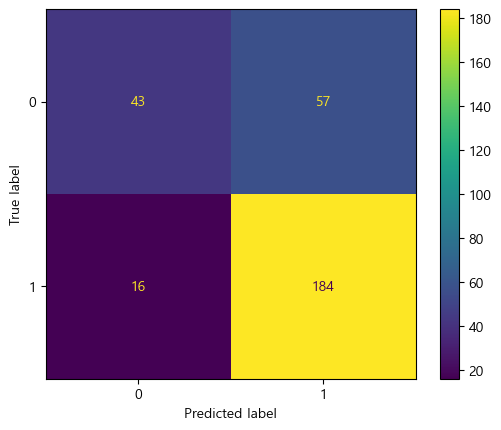

In [17]:
ConfusionMatrixDisplay( cm ).plot()

### 분석 지표

- `sklearn.metrics.accuracy_score( y_true, y_pred, *, normalize=True, sample_weight=None )`  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

- `sklearn.metrics.classification_report( y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn' )`  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [18]:
print( 'Accuracy: ', accuracy_score(y_test, y_pred) )
print()

print( classification_report(y_test, y_pred, digits = 3) )
print()

Accuracy:  0.7566666666666667

              precision    recall  f1-score   support

           0      0.729     0.430     0.541       100
           1      0.763     0.920     0.834       200

    accuracy                          0.757       300
   macro avg      0.746     0.675     0.688       300
weighted avg      0.752     0.757     0.737       300




### ROC curve / AUC

- `sklearn.metrics.roc_curve( y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True )`  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

- `sklearn.metrics.roc_auc_score( y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None )`  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

- `sklearn.metrics.RocCurveDisplay( *, fpr, tpr, roc_auc=None, estimator_name=None, pos_label=None )`  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html

- [참고] https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

Accuracy:  0.7566666666666667
AUC:  0.78825



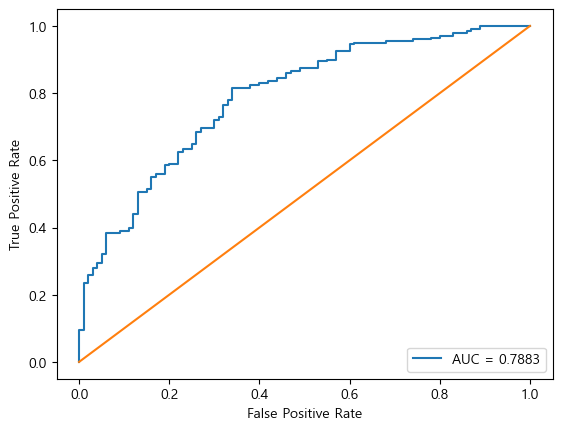

In [19]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ', acc )

# AUC 계산
auc = roc_auc_score( y_test, y_proba )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test, y_proba,
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.4f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )
plt.show()
print()

## 변수 선택/제거하여 회귀분석 수행

### 변수 선택

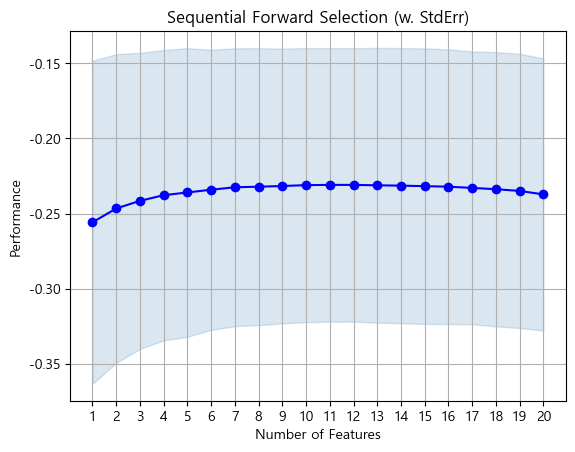

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[-0.12556603354758683, -0.11498139296935656, -...",-0.255778,"(account.balance,)",0.276341,0.215002,0.107501
2,"(0, 1)","[-0.11933717519116126, -0.11087443028506573, -...",-0.246575,"(account.balance, credit.duration.months)",0.263839,0.205276,0.102638
3,"(0, 1, 2)","[-0.10949125458098966, -0.12734421442822674, -...",-0.241495,"(account.balance, credit.duration.months, prev...",0.253109,0.196928,0.098464
4,"(0, 1, 2, 5)","[-0.10690996312681848, -0.12437083199801358, -...",-0.237746,"(account.balance, credit.duration.months, prev...",0.248246,0.193144,0.096572
5,"(0, 1, 2, 5, 11)","[-0.10608405969686668, -0.12231559053081041, -...",-0.235912,"(account.balance, credit.duration.months, prev...",0.246811,0.192027,0.096014
6,"(0, 1, 2, 3, 5, 11)","[-0.11717508226212389, -0.11892843488440492, -...",-0.23409,"(account.balance, credit.duration.months, prev...",0.239495,0.186336,0.093168
7,"(0, 1, 2, 3, 5, 8, 11)","[-0.11827723363162286, -0.11810229518454862, -...",-0.232459,"(account.balance, credit.duration.months, prev...",0.237655,0.184904,0.092452
8,"(0, 1, 2, 3, 5, 8, 11, 15)","[-0.11782905199317752, -0.11754000011841698, -...",-0.232077,"(account.balance, credit.duration.months, prev...",0.23678,0.184223,0.092112
9,"(0, 1, 2, 3, 5, 6, 8, 11, 15)","[-0.11725131522765717, -0.11531119624168568, -...",-0.23163,"(account.balance, credit.duration.months, prev...",0.234884,0.182747,0.091374
10,"(0, 1, 2, 3, 5, 6, 7, 8, 11, 15)","[-0.11560122936784228, -0.11482587201296898, -...",-0.231037,"(account.balance, credit.duration.months, prev...",0.234422,0.182388,0.091194


In [20]:
y = df_credit2.iloc[:,0]
x = df_credit2.iloc[:, 1:]

lr = LinearRegression()

selector = SFS( lr, k_features=20,
                forward=True, floating=True,
                scoring='neg_mean_squared_error',
                cv=5, n_jobs=-1)

selector.fit(x,y)

fig = plot_sfs(selector.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

pd.DataFrame.from_dict(selector.get_metric_dict()).T

### 선택된 변수들로 회귀분석 재진행

In [21]:
# 선택된 변수들 지정
x = x.iloc[:, [0, 1, 2, 3, 5, 6, 7, 8, 11]]

# 상수항 추가
x = add_constant(x)

# 데이터 분할 : train 70%, test 30%
x_train, x_test, y_train, y_test = train_test_split( x, y,
                                                     test_size = 0.3,
                                                     random_state = 0 )

In [22]:
# 로지스틱 회귀분석 실행
model = Logit( y_train, x_train )
fit_model = model.fit()

print( fit_model.summary() )

Optimization terminated successfully.
         Current function value: 0.479986
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          credit.rating   No. Observations:                  700
Model:                          Logit   Df Residuals:                      690
Method:                           MLE   Df Model:                            9
Date:                Fri, 10 Sep 2021   Pseudo R-squ.:                  0.1977
Time:                        02:51:05   Log-Likelihood:                -335.99
converged:                       True   LL-Null:                       -418.79
Covariance Type:            nonrobust   LLR p-value:                 5.092e-31
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              1.2272      0.107     11.465     

#### Odds Ratio 산출

In [23]:
print('< Odds Ratio >')
np.exp(fit_model.params)

< Odds Ratio >


const                             3.411627
account.balance                   1.857013
credit.duration.months            0.638416
previous.credit.payment.status    1.329906
credit.purpose                    0.655176
savings                           1.404385
employment.duration               1.381476
installment.rate                  0.718186
marital.status                    1.292144
current.assets                    0.768896
dtype: float64

#### 다중공선성 확인

In [24]:
# VIF 확인
VIF = pd.DataFrame()

VIF['features'] = x_train.columns
VIF['VIF factor'] = [ variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1]) ]

VIF.round(2)

,features,VIF factor
0,const,1.01
1,account.balance,1.08
2,credit.duration.months,1.16
3,previous.credit.payment.status,1.06
4,credit.purpose,1.02
5,savings,1.06
6,employment.duration,1.11
7,installment.rate,1.05
8,marital.status,1.06
9,current.assets,1.13


### 평가

- [ 주의!!! ]
- sklearn과는 달리 statsmodels을 사용하여 로지스틱 회귀모델을 생성/적합한 경우, predict()를 수행하면 0 또는 1 이 아닌, 1이 관측될 확률을 출력한다. (sklearn 의 `.proba()` 와 동일)
- 따라서 임계값 0.5에 따라 0 또는 1로 변환해주는 추가 작업이 필요하다.

In [25]:
# 1이 관측될 확률
y_proba = fit_model.predict(x_test)

# 예측값 (확률 0.5를 임계점으로 하여 이진변환)
y_pred = (y_proba > 0.5).astype(int)

# 결과 데이터프레임 생성
result = pd.DataFrame()
result['y_proba'] = y_proba
result['y_pred'] = y_pred
result['y_test'] = y_test

print(result)
print()

      y_proba  y_pred  y_test
993  0.735585       1       0
859  0.449905       0       0
298  0.898223       1       1
553  0.871676       1       1
672  0.566324       1       1
..        ...     ...     ...
167  0.829701       1       1
998  0.811505       1       0
984  0.656719       1       0
491  0.973966       1       1
10   0.731147       1       1

[300 rows x 3 columns]



#### Confusion Matrix

In [26]:
conf_mat = pd.crosstab( y_test, y_pred, rownames=['pred'], colnames=['real'] )
conf_mat

real,0,1
pred,,
0,39,61
1,12,188


In [27]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 39,  61],
       [ 12, 188]], dtype=int64)

In [28]:
cm_multi = multilabel_confusion_matrix(y_test, y_pred)
cm_multi

array([[[188,  12],
        [ 61,  39]],

       [[ 39,  61],
        [ 12, 188]]], dtype=int64)

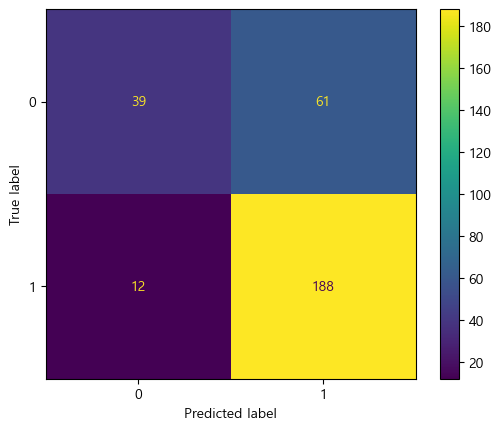

In [29]:
ConfusionMatrixDisplay( cm ).plot()

#### 분석 지표

In [30]:
print( 'Accuracy: ', accuracy_score(y_test, y_pred) )
print()

print( classification_report(y_test, y_pred, digits = 3) )
print()

Accuracy:  0.7566666666666667

              precision    recall  f1-score   support

           0      0.765     0.390     0.517       100
           1      0.755     0.940     0.837       200

    accuracy                          0.757       300
   macro avg      0.760     0.665     0.677       300
weighted avg      0.758     0.757     0.730       300




#### ROC curve / AUC

Accuracy:  0.7566666666666667
AUC:  0.7896000000000001



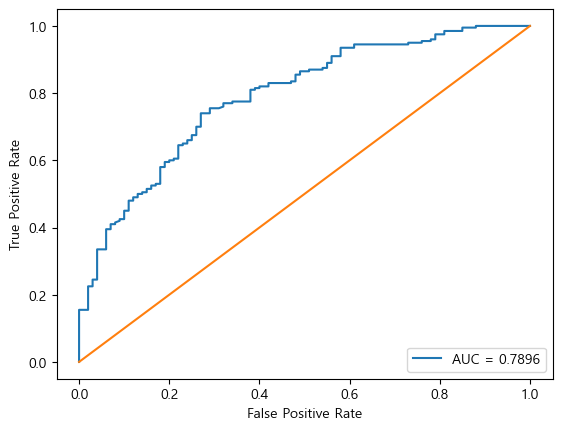

In [31]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ', acc )

# AUC 계산
auc = roc_auc_score( y_test, y_proba )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test, y_proba,
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.4f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )
plt.show()
print()

# 로지스틱 회귀분석 - sklearn

- `sklearn.linear_model.LogisticRegression( penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None )`  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

- `sklearn.linear_model.LogisticRegressionCV( *, Cs=10, fit_intercept=True, cv=None, dual=False, penalty='l2', scoring=None, solver='lbfgs', tol=0.0001, max_iter=100, class_weight=None, n_jobs=None, verbose=0, refit=True, intercept_scaling=1.0, multi_class='auto', random_state=None, l1_ratios=None )`  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html

## x, y 변수 지정 및 데이터셋 분리

In [32]:
# 독립변수, 종속변수 지정
y = df_credit2.iloc[:,0]
x = df_credit2.iloc[:, 1:]

# 데이터 분할 : train 70%, test 30%
x_train, x_test, y_train, y_test = train_test_split( x, y,
                                                     test_size = 0.3,
                                                     random_state = 0 )

## 회귀 모델 생성 및 적합

In [33]:
# 회귀 모델 생성 및 적합
model = LogisticRegression()
fit_model = model.fit( x_train, y_train )

In [34]:
features = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

df_coef = pd.DataFrame()
df_coef['Feature'], df_coef["Coefficients"] = features, params
df_coef['Odds Ratio'] = np.exp(params)

print(df_coef)
print()

                           Feature  Coefficients  Odds Ratio
0                        intercept      1.255465    3.509468
1                  account.balance      0.612978    1.845921
2           credit.duration.months     -0.416949    0.659054
3   previous.credit.payment.status      0.221259    1.247646
4                   credit.purpose     -0.426923    0.652514
5                    credit.amount     -0.030928    0.969545
6                          savings      0.353555    1.424121
7              employment.duration      0.297259    1.346164
8                 installment.rate     -0.354221    0.701720
9                   marital.status      0.236272    1.266518
10                       guarantor      0.034933    1.035550
11              residence.duration     -0.105171    0.900171
12                  current.assets     -0.287476    0.750154
13                             age      0.188394    1.207309
14                   other.credits      0.163335    1.177431
15                  apar

### 다중공선성 확인

In [35]:
# VIF 확인
x_train = add_constant(x_train)

VIF = pd.DataFrame()

VIF['features'] = x_train.columns
VIF['VIF factor'] = [ variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1]) ]

VIF.round(2)

,features,VIF factor
0,const,1.01
1,account.balance,1.11
2,credit.duration.months,2.18
3,previous.credit.payment.status,1.44
4,credit.purpose,1.09
5,credit.amount,2.49
6,savings,1.09
7,employment.duration,1.31
8,installment.rate,1.45
9,marital.status,1.16


## 평가

In [36]:
# 1이 관측될 확률
y_proba = fit_model.predict_proba(x_test)

# 예측값
y_pred = fit_model.predict(x_test)

# 결과 데이터프레임 생성
result = pd.DataFrame()
result['y_proba'] = y_proba[:,1]
result['y_pred'] = y_pred
result['y_test'] = y_test

print(result)
print()

      y_proba  y_pred  y_test
0    0.624340       1     NaN
1    0.493360       0     1.0
2    0.845862       1     1.0
3    0.906537       1     NaN
4    0.482565       0     NaN
..        ...     ...     ...
295  0.910426       1     1.0
296  0.894365       1     NaN
297  0.781872       1     NaN
298  0.956786       1     1.0
299  0.653967       1     1.0

[300 rows x 3 columns]



### Confusion Matrix

In [37]:
conf_mat = pd.crosstab( y_test, y_pred, rownames=['pred'], colnames=['real'] )
conf_mat

real,0,1
pred,,
0,43,57
1,16,184


In [38]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 43,  57],
       [ 16, 184]], dtype=int64)

In [39]:
cm_multi = multilabel_confusion_matrix(y_test, y_pred)
cm_multi

array([[[184,  16],
        [ 57,  43]],

       [[ 43,  57],
        [ 16, 184]]], dtype=int64)

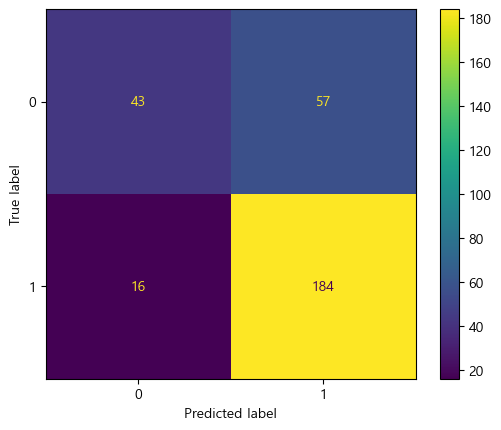

In [40]:
ConfusionMatrixDisplay( cm ).plot()

### 분석 지표

In [41]:
print( 'Accuracy: ', accuracy_score(y_test, y_pred) )
print()

print( classification_report(y_test, y_pred, digits = 3) )
print()

Accuracy:  0.7566666666666667

              precision    recall  f1-score   support

           0      0.729     0.430     0.541       100
           1      0.763     0.920     0.834       200

    accuracy                          0.757       300
   macro avg      0.746     0.675     0.688       300
weighted avg      0.752     0.757     0.737       300




### ROC curve / AUC

Accuracy:  0.7566666666666667
AUC:  0.7884



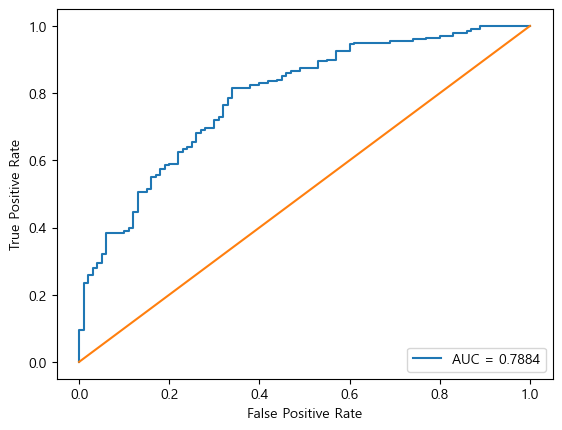

In [42]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ', acc )

# AUC 계산
auc = roc_auc_score( y_test, y_proba[:,1] )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test, y_proba[:,1],
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.4f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )
plt.show()
print()